# HW 4 YOSEP KIM

The accuracy is:  0.9249

----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

## Deep Convolutional Neural Networks (CNN) with Keras + TensorFlow
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

In [1]:
from keras.layers import MaxPooling2D, Convolution2D, Dense, InputLayer
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

import numpy as np

In [3]:
# CNN
from keras.layers import Convolution2D, MaxPooling2D

In [4]:
# import some utilities to transform our data
from keras.utils import np_utils

## Let's use the Fashion-MNIST Dataset including 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images:

0:	T-shirt/top, 
1:	Trouser,
2:	Pullover,
3:	Dress,
4:	Coat,
5:	Sandal,
6:	Shirt,
7:	Sneaker,
8:	Bag,
9:	Ankle boot 

In [5]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


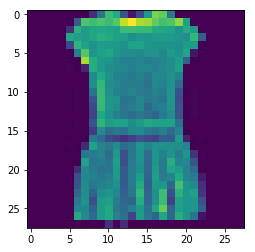

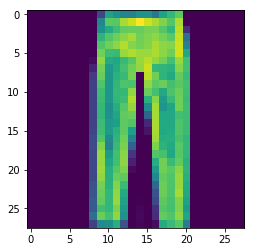

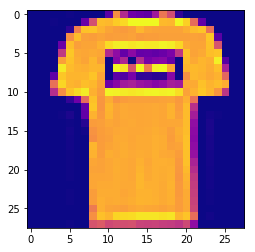

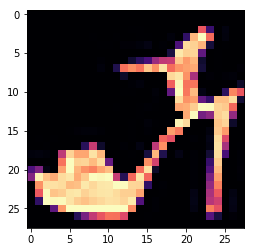

In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()

imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [12]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [13]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


In [16]:
from keras import backend as K, regularizers, optimizers

# documentation https://faroit.github.io/keras-docs/1.2.2/layers/convolutional/

## Define the Network Architecture (model):

In [17]:
# Declare Sequential model fro our network:
model = Sequential()

In [18]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
print(model.output_shape) # -> (None, 26, 26, 32)

# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

(None, 26, 26, 32)


In [19]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [20]:
# output Fully connected Dense layers:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compile the model:
#### We need to compile the model and then it will be ready to train it:

In [21]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Training:

In [22]:
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=45, verbose=1)


# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iteration over the entire x and y data provided. 
# verbose: 0, 1, or 2. how want to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Train on 45000 samples, validate on 15000 samples
Epoch 1/45
45000/45000 [==============================] - 64s 1ms/step - loss: 0.5251 - acc: 0.8142 - val_loss: 0.3237 - val_acc: 0.8819
Epoch 2/45
45000/45000 [==============================] - 63s 1ms/step - loss: 0.3567 - acc: 0.8717 - val_loss: 0.2870 - val_acc: 0.8935
Epoch 3/45
45000/45000 [==============================] - 64s 1ms/step - loss: 0.3113 - acc: 0.8858 - val_loss: 0.2620 - val_acc: 0.8989
Epoch 4/45
45000/45000 [==============================] - 64s 1ms/step - loss: 0.2763 - acc: 0.8984 - val_loss: 0.2414 - val_acc: 0.9100
Epoch 5/45
45000/45000 [==============================] - 65s 1ms/step - loss: 0.2577 - acc: 0.9043 - val_loss: 0.2387 - val_acc: 0.9130
Epoch 6/45
45000/45000 [==============================] - 65s 1ms/step - loss: 0.2357 - acc: 0.9130 - val_loss: 0.2302 - val_acc: 0.9141
Epoch 7/45
45000/45000 [==============================] - 66s 1ms/step - loss: 0.2206 - acc: 0.9181 - val_loss: 0.2423 - val_acc

In [27]:
# Training with Validation:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
fitted_model = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=15, verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/15
45000/45000 [==============================] - 68s 2ms/step - loss: 0.0823 - acc: 0.9686 - val_loss: 0.2899 - val_acc: 0.9287
Epoch 2/15
45000/45000 [==============================] - 113s 3ms/step - loss: 0.0806 - acc: 0.9700 - val_loss: 0.2953 - val_acc: 0.9280
Epoch 3/15
45000/45000 [==============================] - 150s 3ms/step - loss: 0.0774 - acc: 0.9706 - val_loss: 0.3133 - val_acc: 0.9257
Epoch 4/15
45000/45000 [==============================] - 101s 2ms/step - loss: 0.0784 - acc: 0.9702 - val_loss: 0.3276 - val_acc: 0.9251
Epoch 5/15
45000/45000 [==============================] - 65s 1ms/step - loss: 0.0779 - acc: 0.9710 - val_loss: 0.3184 - val_acc: 0.9302
Epoch 6/15
45000/45000 [==============================] - 106s 2ms/step - loss: 0.0773 - acc: 0.9718 - val_loss: 0.3135 - val_acc: 0.9262
Epoch 7/15
45000/45000 [==============================] - 124s 3ms/step - loss: 0.0734 - acc: 0.9729 - val_loss: 0.3076 - va

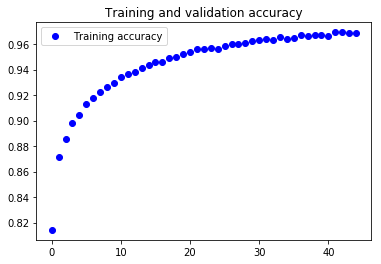

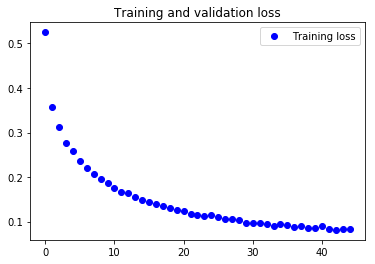

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['acc']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

## Testing: before fitting 
The accuracy is:  0.9214

# After fitting accuracy

In [30]:
# test_data_shaped, test_target_shaped  
predicted_classes = model.predict_classes(X_test)

In [31]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

10000/10000 [==============================] - 3s 270us/step
The accuracy is:  0.9249
